Load the data.

In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_fdf52831014b446a9805fd013e418ce3.csv"
df=pd.read_csv(url)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,15.82,16.72,15.78,16.42,242963398,-4.42849,1.380223,239655616.0,16.71,15.97,-2.470660,19,0.187852
2,1,AA,1/21/2011,15.82,16.72,15.78,16.42,138428495,-2.47066,-43.024959,242963398.0,16.71,15.97,1.638310,12,0.189994
3,1,AA,1/28/2011,15.82,16.72,15.78,16.42,151379173,1.63831,9.355500,138428495.0,16.71,15.97,5.933250,5,0.185989
4,1,AA,2/4/2011,15.82,16.72,15.78,16.42,154387761,5.93325,1.987452,151379173.0,16.71,15.97,0.230814,97,0.175029


Size of the data frame.

In [2]:
df.shape

(750, 16)

As shown, the target column has null values. Extract the rows for which the target value is null.

In [3]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.792670,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
25,1,AXP,1/7/2011,15.82,16.72,15.78,16.42,45102042,2.448040,NaN,NaN,16.71,15.97,4.638010,89,0.405771
50,1,BA,1/7/2011,15.82,16.72,15.78,16.42,36258120,4.882840,NaN,NaN,16.71,15.97,0.936330,33,0.605362
75,1,BAC,1/7/2011,15.82,16.72,15.78,16.42,1453438639,2.888090,NaN,NaN,16.71,15.97,7.621740,54,0.070175
100,1,CAT,1/7/2011,15.82,16.72,15.78,16.42,24135903,-0.688705,NaN,NaN,16.71,15.97,0.858277,11,0.469433


In [4]:
print("The rows for which the target value is null consists of ",len(rows_with_NaN)/len(df)*100,"% of the data.")

The rows for which the target value is null consists of  4.0 % of the data.


Fill the cells with null values with the column mean.

In [5]:
mean_volume=df[["percent_change_volume_over_last_wk"]].mean()
mean_volume

percent_change_volume_over_last_wk    5.593627
dtype: float64

In [6]:
df_volume=df[["percent_change_volume_over_last_wk"]].fillna(mean_volume)
df_volume.head()

,percent_change_volume_over_last_wk
0,5.593627
1,1.380223
2,-43.024959
3,9.355500
4,1.987452


In [7]:
previous_mean=df[["previous_weeks_volume"]].mean()
previous_mean

previous_weeks_volume    1.173876e+08
dtype: float64

In [8]:
previous_mean=df[["previous_weeks_volume"]].fillna(previous_mean)
previous_mean.head()

,previous_weeks_volume
0,1.173876e+08
1,2.396556e+08
2,2.429634e+08
3,1.384285e+08
4,1.513792e+08


In [9]:
df_sub=df.drop(["percent_change_volume_over_last_wk","previous_weeks_volume"],axis=1)
df=pd.concat([df_sub,df_volume,previous_mean],axis=1)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk,previous_weeks_volume
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,16.71,15.97,-4.428490,26,0.182704,5.593627,1.173876e+08
1,1,AA,1/14/2011,15.82,16.72,15.78,16.42,242963398,-4.42849,16.71,15.97,-2.470660,19,0.187852,1.380223,2.396556e+08
2,1,AA,1/21/2011,15.82,16.72,15.78,16.42,138428495,-2.47066,16.71,15.97,1.638310,12,0.189994,-43.024959,2.429634e+08
3,1,AA,1/28/2011,15.82,16.72,15.78,16.42,151379173,1.63831,16.71,15.97,5.933250,5,0.185989,9.355500,1.384285e+08
4,1,AA,2/4/2011,15.82,16.72,15.78,16.42,154387761,5.93325,16.71,15.97,0.230814,97,0.175029,1.987452,1.513792e+08


In [10]:
df=df.drop(["quarter","stock","date"],axis=1)
X=df.drop(["percent_change_next_weeks_price"],axis=1)
y=df[["percent_change_next_weeks_price"]]

In [11]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

C:\Users\kensh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,scores
10,1.910670e-02
4,2.210024e-03
0,6.666667e-04
5,4.744309e-04
2,1.776357e-15
3,1.776357e-15
6,1.776357e-15
7,1.776357e-15
1,0.000000e+00
8,0.000000e+00


In [12]:
features=scores[scores["scores"]>0]
features

,scores
10,1.910670e-02
4,2.210024e-03
0,6.666667e-04
5,4.744309e-04
2,1.776357e-15
3,1.776357e-15
6,1.776357e-15
7,1.776357e-15


In [13]:
X=X.iloc[:,features.index]
X.head()

,percent_change_volume_over_last_wk,volume,open,percent_change_price,low,close,next_weeks_open,next_weeks_close
0,5.593627,239655616,15.82,3.79267,15.78,16.42,16.71,15.97
1,1.380223,242963398,15.82,-4.42849,15.78,16.42,16.71,15.97
2,-43.024959,138428495,15.82,-2.47066,15.78,16.42,16.71,15.97
3,9.355500,151379173,15.82,1.63831,15.78,16.42,16.71,15.97
4,1.987452,154387761,15.82,5.93325,15.78,16.42,16.71,15.97


In [14]:
df=pd.concat([X,y],axis=1)
df.head()

,percent_change_volume_over_last_wk,volume,open,percent_change_price,low,close,next_weeks_open,next_weeks_close,percent_change_next_weeks_price
0,5.593627,239655616,15.82,3.79267,15.78,16.42,16.71,15.97,-4.428490
1,1.380223,242963398,15.82,-4.42849,15.78,16.42,16.71,15.97,-2.470660
2,-43.024959,138428495,15.82,-2.47066,15.78,16.42,16.71,15.97,1.638310
3,9.355500,151379173,15.82,1.63831,15.78,16.42,16.71,15.97,5.933250
4,1.987452,154387761,15.82,5.93325,15.78,16.42,16.71,15.97,0.230814


Standardize the numeric values.

In [15]:
from sklearn import preprocessing
df_numeric=pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),columns=df.columns)
df_numeric.head()

,percent_change_volume_over_last_wk,volume,open,percent_change_price,low,close,next_weeks_open,next_weeks_close,percent_change_next_weeks_price
0,1.342445e-16,0.771212,1.0,1.487366,1.0,-1.0,-1.0,-1.0,-1.742865
1,-1.061398e-01,0.792103,1.0,-1.780016,1.0,-1.0,-1.0,-1.0,-1.011718
2,-1.224750e+00,0.131879,1.0,-1.001905,1.0,-1.0,-1.0,-1.0,0.522768
3,9.476531e-02,0.213673,1.0,0.631147,1.0,-1.0,-1.0,-1.0,2.126703
4,-9.084310e-02,0.232675,1.0,2.338109,1.0,-1.0,-1.0,-1.0,-0.002858


In [16]:
X=df_numeric.drop(["percent_change_next_weeks_price"],axis=1)
X.head()

,percent_change_volume_over_last_wk,volume,open,percent_change_price,low,close,next_weeks_open,next_weeks_close
0,1.342445e-16,0.771212,1.0,1.487366,1.0,-1.0,-1.0,-1.0
1,-1.061398e-01,0.792103,1.0,-1.780016,1.0,-1.0,-1.0,-1.0
2,-1.224750e+00,0.131879,1.0,-1.001905,1.0,-1.0,-1.0,-1.0
3,9.476531e-02,0.213673,1.0,0.631147,1.0,-1.0,-1.0,-1.0
4,-9.084310e-02,0.232675,1.0,2.338109,1.0,-1.0,-1.0,-1.0


In [17]:
y=df_numeric[["percent_change_next_weeks_price"]]
y.head()

,percent_change_next_weeks_price
0,-1.742865
1,-1.011718
2,0.522768
3,2.126703
4,-0.002858


Clustering analysis to find the patterns. We don't know what clustering algorithm suits this dataset. Hence we are going to try all clustering algorithm in the sklearn library.

KMeans

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters=np.arange(2,16)
silhouette=[]
for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)
    silhouette.append(silhouette_avg)

For n_clusters = 2  ,the average silhouette_score is : 0.5524660202882952
For n_clusters = 3  ,the average silhouette_score is : 0.29385692252858264
For n_clusters = 4  ,the average silhouette_score is : 0.2953528934564245
For n_clusters = 5  ,the average silhouette_score is : 0.30071700215457103
For n_clusters = 6  ,the average silhouette_score is : 0.2604283983314504
For n_clusters = 7  ,the average silhouette_score is : 0.2784727573072847
For n_clusters = 8  ,the average silhouette_score is : 0.2772321048263532
For n_clusters = 9  ,the average silhouette_score is : 0.2726655568939347
For n_clusters = 10  ,the average silhouette_score is : 0.27218732552754554
For n_clusters = 11  ,the average silhouette_score is : 0.2699517700125207
For n_clusters = 12  ,the average silhouette_score is : 0.2656334123749682
For n_clusters = 13  ,the average silhouette_score is : 0.26544357680039227
For n_clusters = 14  ,the average silhouette_score is : 0.27082235649516123
For n_clusters = 15  ,the av

AffinityPropagation

In [19]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import davies_bouldin_score


clusterer = AffinityPropagation()
cluster_labels = clusterer.fit_predict(X)
davies_bouldin_score = davies_bouldin_score(X, cluster_labels)
score=silhouette_score(X, cluster_labels,metric='euclidean')
print("The Davies Bouldin score is: ",davies_bouldin_score)
print("The Silhouette score is: ",score)

C:\Users\kensh\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


The Davies Bouldin score is:  0.8423318921199513
The Silhouette score is:  0.25705514878219615


Mean Shift

In [20]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.9, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels=ms.fit_predict(X)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("The number of clusters is: ",n_clusters_)
print("The silhouette score is: ",silhouette_score(X, labels))

The number of clusters is:  5
The silhouette score is:  0.5852847721804861


SpectralClustering

In [21]:
from sklearn.cluster import SpectralClustering

n_clusters=np.arange(2,13)

for n_clusters in n_clusters:
    clusterer = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize",random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)

For n_clusters = 2  ,the average silhouette_score is : 0.7872539725116846
For n_clusters = 3  ,the average silhouette_score is : 0.6066333239323736
For n_clusters = 4  ,the average silhouette_score is : 0.5681960658386842
For n_clusters = 5  ,the average silhouette_score is : 0.5443242618800926
For n_clusters = 6  ,the average silhouette_score is : 0.485925038699047
For n_clusters = 7  ,the average silhouette_score is : 0.4375263843330684
For n_clusters = 8  ,the average silhouette_score is : 0.4118819468506062
For n_clusters = 9  ,the average silhouette_score is : 0.39267375079306127
For n_clusters = 10  ,the average silhouette_score is : 0.3977987500521832
For n_clusters = 11  ,the average silhouette_score is : 0.35652003541361127
For n_clusters = 12  ,the average silhouette_score is : 0.29212135261551353


AgglomerativeClustering

In [22]:
from sklearn.cluster import AgglomerativeClustering

n_clusters=np.arange(2,13)
for n_clusters in n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)

For n_clusters = 2  ,the average silhouette_score is : 0.22045872153753404
For n_clusters = 3  ,the average silhouette_score is : 0.23900882426682554
For n_clusters = 4  ,the average silhouette_score is : 0.2560441564890868
For n_clusters = 5  ,the average silhouette_score is : 0.2631393508548657
For n_clusters = 6  ,the average silhouette_score is : 0.2743954493101457
For n_clusters = 7  ,the average silhouette_score is : 0.2405554396660951
For n_clusters = 8  ,the average silhouette_score is : 0.24901706431519877
For n_clusters = 9  ,the average silhouette_score is : 0.25055770352572554
For n_clusters = 10  ,the average silhouette_score is : 0.21793512629455214
For n_clusters = 11  ,the average silhouette_score is : 0.21045114983720392
For n_clusters = 12  ,the average silhouette_score is : 0.2158521872417435


DBSCAN. I am going skip DBSCAN. There is just no value for "eps", the most important parameter for DBSCAN, that would produce at least 2 clusters.

In [28]:
from sklearn.cluster import OPTICS
clust = OPTICS(min_samples=60,p=2,xi=0.01)
labels=clust.fit_predict(X)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("The number of clusters is: ",n_clusters_)
print("The silhouette score is: ",silhouette_score(X, labels))

The number of clusters is:  2
The silhouette score is:  -0.09262991809534751


The most suitable clustering algorithm is SpectralClustering with N=2.

In [43]:
clusterer = SpectralClustering(n_clusters=2, assign_labels="discretize",random_state=0)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean')
print("For n_clusters = 2，the average silhouette_score is :", silhouette_avg,)

For n_clusters = 2，the average silhouette_score is : 0.7872539725116846


Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.

In [44]:
from sklearn.decomposition import PCA

pca=pd.DataFrame(PCA(n_components=3).fit_transform(X)).rename(columns={0:"x",1:"y",2:"z"})
labels=pd.DataFrame(cluster_labels).rename(columns={0:"label"})
pca=pd.concat([pca,labels],axis=1)
pca.head()

,x,y,z,label
0,-0.477689,1.384796,0.813130,0
1,1.396061,-0.197151,-1.348813,0
2,-0.097487,-0.107863,-1.581164,0
3,-0.203049,0.470895,0.435904,0
4,-1.315469,1.377422,1.378911,0


Attach the labels to the data with reduced dimensions by PCA.

In [45]:
np.unique(pca[["label"]])

array([0, 1], dtype=int64)

In [46]:
pca_0=pca[pca["label"]==0]
pca_1=pca[pca["label"]==1]
x_0=pca_0[["x"]]
y_0=pca_0[["y"]]
z_0=pca_0[["z"]]
x_1=pca_1[["x"]]
y_1=pca_1[["y"]]
z_1=pca_1[["z"]]

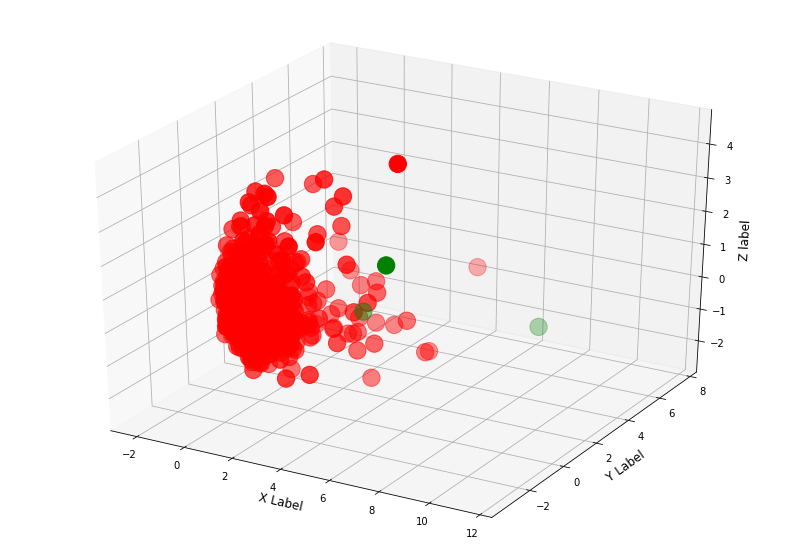

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_0, y_0, z_0,color="r",s=300)
ax.scatter(x_1,y_1,z_1,color="g",s=300)

ax.set_xlabel('X Label',fontsize=12)
ax.set_ylabel('Y Label',fontsize=12)
ax.set_zlabel('Z label',fontsize=12)

plt.show()

After reducing the predictors to 2 dimension with PCA and plot it on a graph, it is clear that the data is not convex and the clusters cannot be described by just the centroids and structures. The clusters also have dissimilar densities. **After seeing the plot for PCA-transformed data, it is not surprising that SpectralClustering is the best clustering algorithm for this dataset.** 

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape)
print(X_test.shape)

(450, 8)
(300, 8)


In [49]:
from sklearn.ensemble import RandomForestRegressor

import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestRegressor(criterion="mse",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 8, verbose=2, n_jobs = -1)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 29.3min finished
C:\Users\kensh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [53]:
from sklearn.metrics import r2_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("R-squared on test data is: ",r2_score(y_test,y_pred))

R-squared on test data is:  -0.035655244982342404


This dataset is not suitable for a regression task.